In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab



---



# Properly using DMA (Direct Memory Access) for data copying

### Example which show how important is method of using RAM memory in such simple working like copying data from one array to another...

In [7]:
## For simplify our arrays will be symmetrical (i=j)

from time import perf_counter

def copy_array_cells(num):
    a = np.zeros((num, num), dtype='int8')
    b = np.ones((num, num), dtype='int8')
    start = perf_counter()
    for j in range(num):
        for i in range(num):
            b[i,j] = a[i,j]
    end = perf_counter()
    return end - start


def copy_array_columns(num):
    a = np.zeros((num, num), dtype='int8')
    b = np.ones((num, num), dtype='int8')
    start = perf_counter()
    for i in range(num):
        b[:,i] = a[:,i]
    end = perf_counter()
    return end - start


def copy_array_rows(num):
    a = np.zeros((num, num), dtype='int8')
    b = np.ones((num, num), dtype='int8')
    start = perf_counter()
    for i in range(num):
        b[i,:] = a[i,:]
    end = perf_counter()
    return end - start


def copy_array_at_once(num):
    a = np.zeros((num, num), dtype='int8')
    b = np.ones((num, num), dtype='int8')
    start = perf_counter()
    b[:,:] = a[:,:]
    end = perf_counter()
    return end - start

In [3]:
array_shapes = [100, 200, 500, 1000, 2000, 5000, 10000]

df = pd.DataFrame(array_shapes, columns=['array_shape'])
df

,array_shape
0,100
1,200
2,500
3,1000
4,2000
5,5000
6,10000


### Calculate executon time for every functions above

In [8]:
df['copy_cells'] = df['array_shape'].map(lambda array_shapes: copy_array_cells(array_shapes))
df['copy_columns'] = df['array_shape'].map(lambda array_shapes: copy_array_columns(array_shapes))
df['copy_rows'] = df['array_shape'].map(lambda array_shapes: copy_array_rows(array_shapes))
df['copy_all'] = df['array_shape'].map(lambda array_shapes: copy_array_at_once(array_shapes))
df

,array_shape,copy_cells,copy_columns,copy_rows,copy_all
0,100,0.003287,0.000095,0.000109,0.000005
1,200,0.013019,0.000272,0.000203,0.000005
2,500,0.083053,0.001263,0.000518,0.000023
3,1000,0.324658,0.003895,0.000973,0.000073
4,2000,1.292270,0.067332,0.003038,0.000991
5,5000,8.406007,0.871666,0.012720,0.007088
6,10000,33.568680,3.871832,0.042303,0.028596


In [7]:
#df.to_csv("array_copy_speed.csv", index_label=False)
df = pd.read_csv("array_copy_speed.csv")

### Plot presenting copying time between medium size arrays (10000x10000 cells maximum)

In [14]:
def execution_time_plot(df, cols_name, max_y_value, y_ticks, x_label, title):

    fig, ax = plt.subplots(figsize=(22, 9))

    colors = pylab.cm.Dark2(np.linspace(0, 1, len(cols_name)))
    array_shape = df.iloc[:,0]

    for col_name, color in zip(cols_name, colors):
        plt.plot(array_shape, df[col_name], lw=2, marker='d', markersize=8, color=color, label=col_name)
    ## +1 is made to give some 'margin' (space) for the last x and y data on plot
    plt.xlim((min(array_shape), max(array_shape) + 1))
    plt.ylim((0, max_y_value))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel(x_label, fontsize=22, labelpad=16)
    plt.ylabel('Execution time (in seconds)', fontsize=22, labelpad=12)
    plt.xscale('log')
    ax.tick_params(axis='both', which='both', width=2, labelsize=14)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=6, color='green')
    plt.yticks(ticks=y_ticks, label=y_ticks, fontsize=14)
    plt.legend(fontsize=16)
    plt.grid(which='both', color='gray', linestyle='dashdot', linewidth=0.6)
    plt.title(title, fontsize=26, pad=20)
    plt.show()

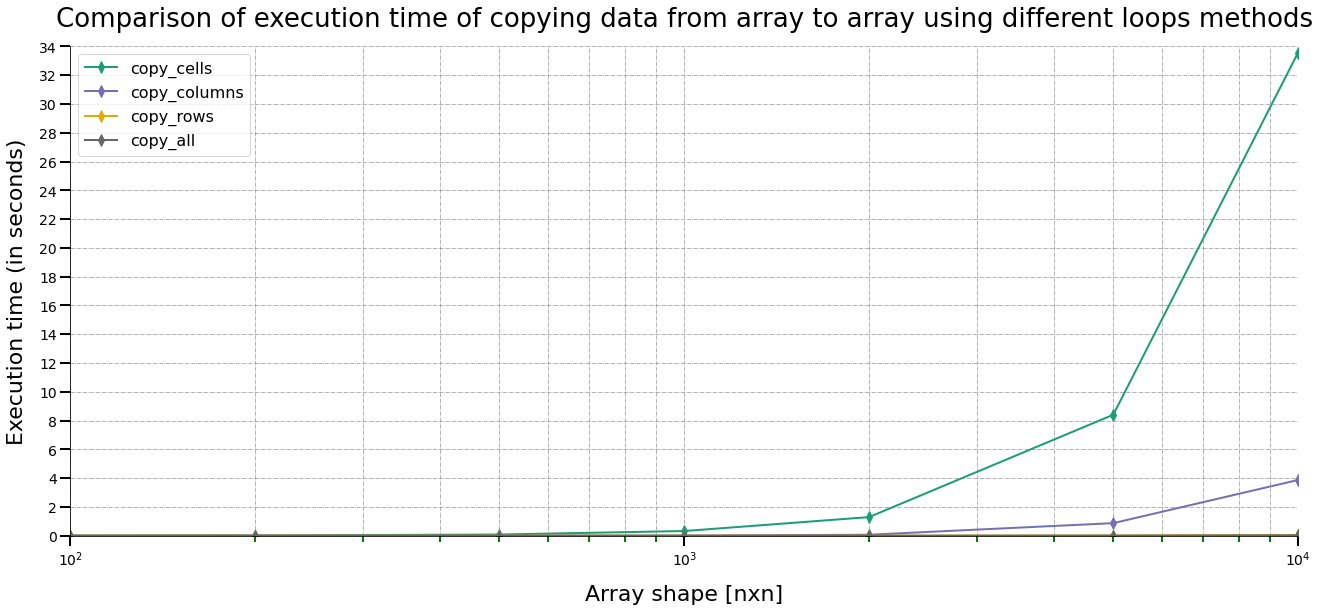

In [15]:
cols_name = (df.columns)[1:] ## all features without variable
max_y_value = df[cols_name].max(axis=1).max(axis=0)
y_ticks = np.linspace(0, int(max_y_value) + 1, int(max_y_value/2) + 2)
x_label = 'Array shape [nxn]'
title = 'Comparison of execution time of copying data from array to array using different loops methods'

execution_time_plot(df, cols_name, max_y_value, y_ticks, x_label, title)

### There is a huge time gaps between 2 first and 2 last loop processes which we can use on much bigger arrays...

## BEWARE!! Operation of copying data between arrays with shapes 100000x100000 cells require at least 20GB of RAM memory!!

In [12]:
array_shapes_2 = [20000, 50000, 100000]
df1 = pd.DataFrame(array_shapes_2, columns=['array_shape'])

df1['copy_columns'] = df1['array_shape'].map(lambda array_shapes_2: copy_array_columns(array_shapes_2))
df1['copy_rows'] = df1['array_shape'].map(lambda array_shapes_2: copy_array_rows(array_shapes_2))
df1['copy_all'] = df1['array_shape'].map(lambda array_shapes_2: copy_array_at_once(array_shapes_2))

In [13]:
full_df = pd.concat([df, df1], keys='array_shape', axis=0, ignore_index=True)
full_df

,array_shape,copy_cells,copy_columns,copy_rows,copy_all
0,100,0.003287,0.000095,0.000109,0.000005
1,200,0.013019,0.000272,0.000203,0.000005
2,500,0.083053,0.001263,0.000518,0.000023
3,1000,0.324658,0.003895,0.000973,0.000073
4,2000,1.292270,0.067332,0.003038,0.000991
5,5000,8.406007,0.871666,0.012720,0.007088
6,10000,33.568680,3.871832,0.042303,0.028596
7,20000,NaN,18.551890,0.219585,0.122820
8,50000,NaN,185.982179,0.847257,0.736484
9,100000,NaN,1098.324318,4.355135,3.124448


In [16]:
#full_df.to_csv('full_array_copy_results.csv', index_label=False)
full_df = pd.read_csv('full_array_copy_results.csv')

### Plot presenting copying time between huge size arrays (100000x100000 cells maximum)

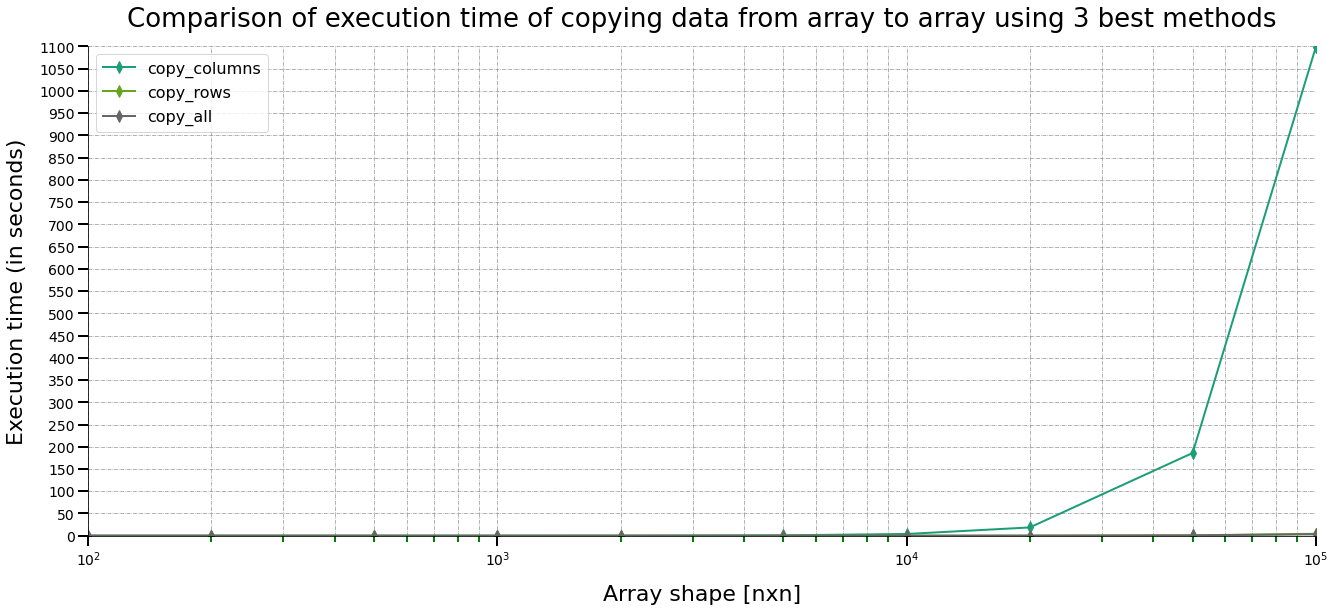

In [17]:
cols_name = (full_df.columns)[-3:]
max_y_value = full_df[cols_name].max(axis=1).max(axis=0)
y_ticks = np.linspace(0, int(max_y_value) + 2, 4*int((max_y_value + 2) / 220) + 3)
title = 'Comparison of execution time of copying data from array to array using 3 best methods'

execution_time_plot(full_df, cols_name, max_y_value, y_ticks, x_label, title)

### **CONCLUSION:**
### For arrays with dimensions less than 20000x20000 copying column-by-column is fast enough, but for huge arrays (more than 50000x50000 cells) we have to use 2 last copying ways (by rows or whole array). Copying row by row is more advisable, because it does not need so much memory (after copying some part of data system may free allocated memory) and additionally total execution time is comparable with copying all the data at once. Copying row is used very often in practice.

---

## **Decorators in Python**

### Comparison of execution time Fibbonaci sum with 2 decorators:
### - `@njit` Numba (which used pure 'machine code')
### - Python `@lru_cache` (based on LRU caching)

In [2]:
from time import perf_counter
from numba import njit
from functools import lru_cache

In [20]:
df_fibonacci = pd.DataFrame(data={'n': range(1, 41, 1),
                                  'numba': np.NaN,
                                  'lru_cache': np.NaN})

In [21]:
@njit(fastmath=True, cache=True)
def fib_1(n):
    if n < 2:
        return n
    else:
        return fib_1(n-1) + fib_1(n-2)

for ind, val in enumerate(df_fibonacci['n'].values):
    start = perf_counter()
    fib_1(val)
    end = perf_counter()
    df_fibonacci.loc[ind, 'numba'] = end - start

In [22]:
@lru_cache()
def fib_2(n):
    if n < 2:
        return n
    else:
        return fib_2(n-1) + fib_2(n-2)

for ind, val in enumerate(df_fibonacci['n'].values):
    start = perf_counter()
    fib_2(val)
    end = perf_counter()
    df_fibonacci.loc[ind, 'lru_cache'] = end - start

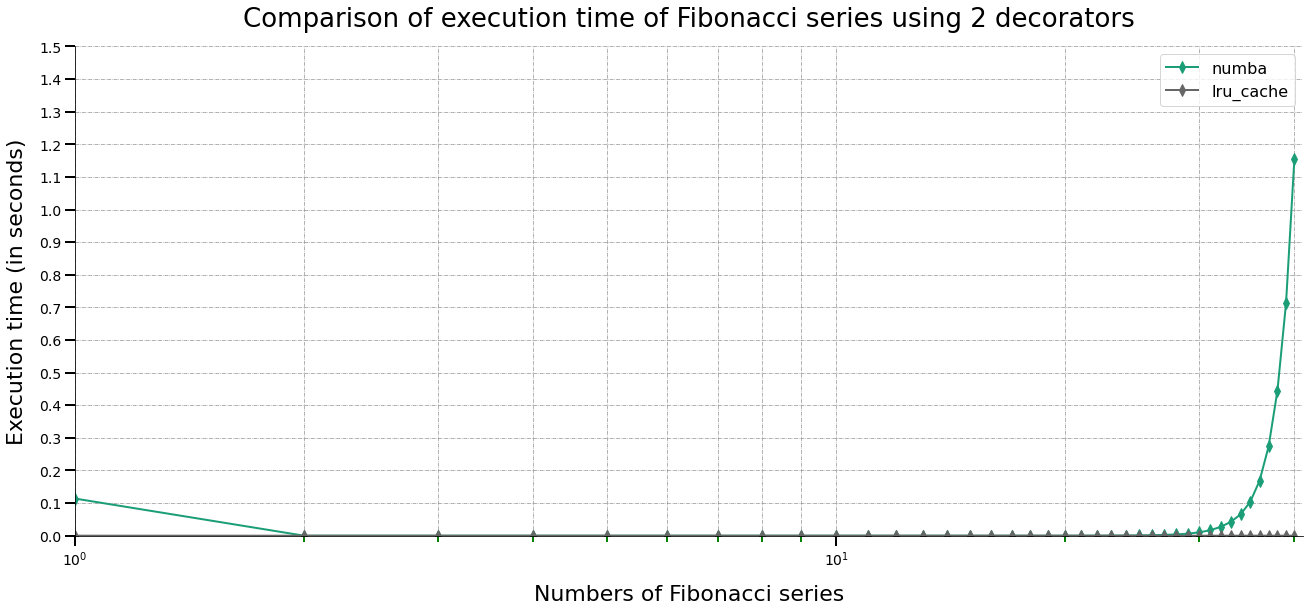

In [29]:
cols_name = (df_fibonacci.columns)[1:] ## all features without variable
max_y_value = df_fibonacci[cols_name].max(axis=1).max(axis=0)
y_ticks = np.linspace(0, int(max_y_value) + 0.5, 15 * int(max_y_value) + 1)
x_label = 'Numbers of Fibonacci series'
title = 'Comparison of execution time of Fibonacci series using 2 decorators'

execution_time_plot(df_fibonacci, cols_name, max_y_value, y_ticks, x_label, title)

---

## Mathematic tasks with Python

In [107]:
df_pi_calc = pd.DataFrame(columns=['N', 'PI_1', 'PI_2'])
df_pi_calc['N'] = np.arange(3, 10001, 1, dtype='int')

### Calculating pi value - method 1 (regular polygon inscribed in a circle)

For circle radius = 1 we calculate how many edges (N) must have regular polygon, so that the relative different in pi values is no more than 0.1%.

In [108]:
R = 1

for i, N in enumerate(df_pi_calc['N'].values):
    pseudo_pi_1 = N*0.5*(R**2)*np.sin((360/N)*(np.pi/180))
    
    if pseudo_pi_1 != round(np.pi, 6):
        df_pi_calc.loc[i, 'PI_1'] = pseudo_pi_1
    else:
        break

### Calculating pi value - method 2 (Monte-Carlo)

In [109]:
inside = 0

for i, val in enumerate(list(df_pi_calc.index)):
    x, y = np.random.uniform(0, R), np.random.uniform(0, R)
    
    if (x**2 + y**2) <= R:
        inside += 1

    pseudo_pi_2 = 4 * (inside / (i+1))
    
    if pseudo_pi_2 != round(np.pi, 6):
        df_pi_calc.loc[i-2, 'PI_2'] = pseudo_pi_2
    else:
        break

In [111]:
df_pi_calc = df_pi_calc.dropna(how='all', subset=['PI_1', 'PI_2'], axis=0)

In [112]:
df_pi_calc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to -1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       9998 non-null   float64
 1   PI_1    9998 non-null   object 
 2   PI_2    9998 non-null   object 
dtypes: float64(1), object(2)
memory usage: 312.5+ KB


In [113]:
df_pi_calc[['PI_1', 'PI_2']] = df_pi_calc[['PI_1', 'PI_2']].astype('float')

In [114]:
df_pi_calc.to_csv('PI_calculating.csv', index_label=False)

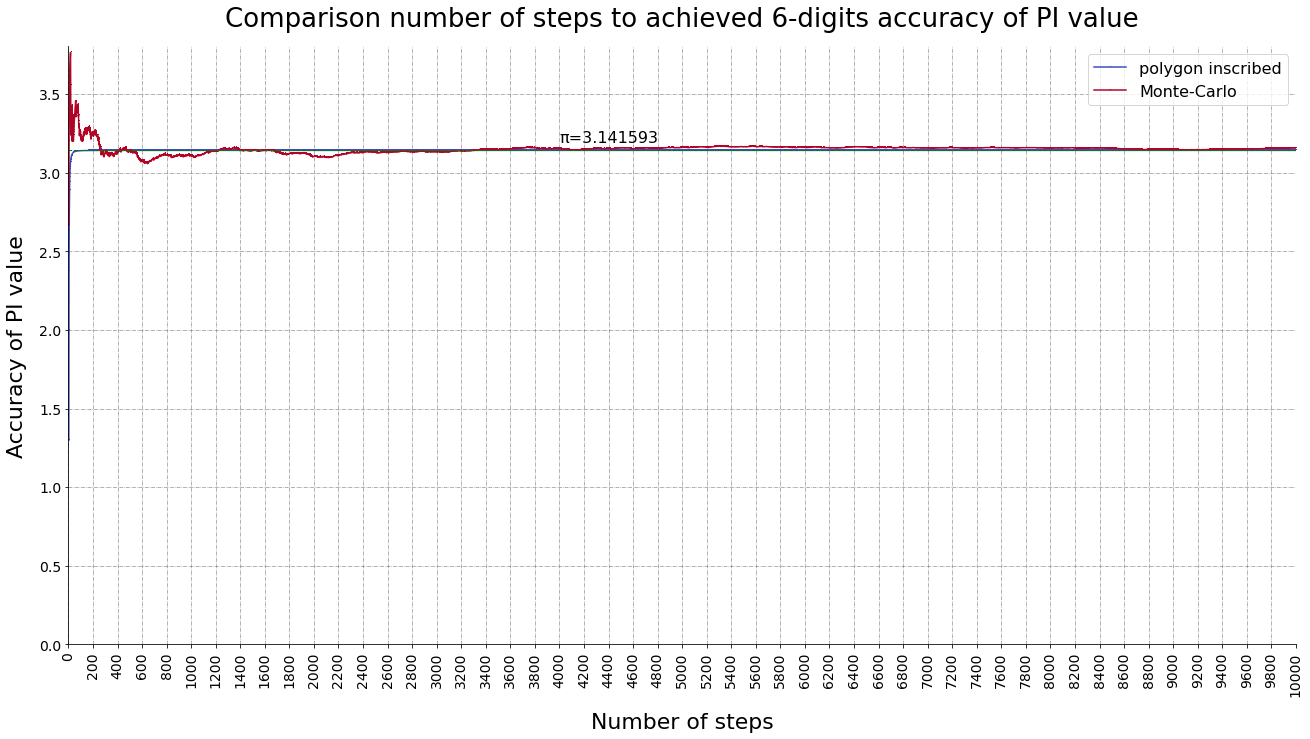

In [118]:
fig, ax = plt.subplots(figsize=(22, 11))

cols_name = (df_pi_calc.columns)[1:]  # 2 last columns only
labels = ['polygon inscribed', 'Monte-Carlo']
colors = pylab.cm.coolwarm(np.linspace(0, 1, len(cols_name)))
array_shape = df_pi_calc['N']
y_min = 0.99 * (df_pi_calc[cols_name].min(axis=1).min(axis=0))
y_max = 1.01 * (df_pi_calc[cols_name].max(axis=1).max(axis=0))
ticks_num = np.arange(0, len(array_shape) + 1, 200)


for col_name, color, label in zip(cols_name, colors, labels):
    plt.plot(array_shape, df_pi_calc[col_name], lw=1.5,
    marker=',', color=color, label=label)

plt.xlim((0, max(array_shape)+1))
plt.ylim((y_min, y_max))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Number of steps', fontsize=22, labelpad=16)
plt.ylabel('Accuracy of PI value', fontsize=22, labelpad=12)
plt.xticks(ticks=ticks_num, label=ticks_num, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(np.pi, color='green', linewidth=1, linestyle='--')
plt.text(x=0.4*len(array_shape), y= 0.05 + np.pi, s=f'π={np.pi:.6f}', fontsize=16)
plt.legend(fontsize=16)
plt.grid(color='gray', linestyle='dashdot', linewidth=0.6)
plt.title('Comparison number of steps to achieved 6-digits accuracy of PI value',
          fontsize=26, pad=20)
plt.show()